In [3]:
import sys
assert sys.version_info >= (3,5)
import sklearn
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize= 12)


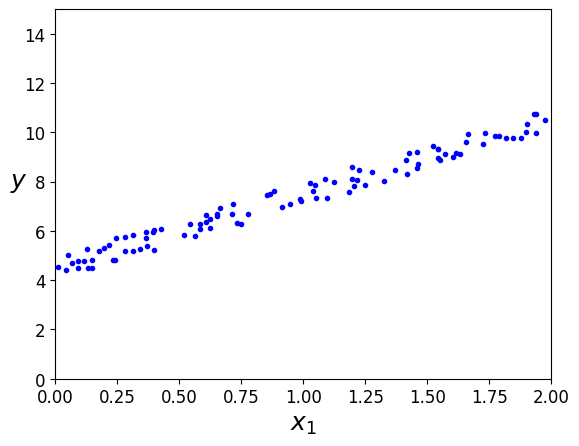

In [5]:
#normal equation
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X+ np.random.rand(100,1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#we are just generate a liner model y = 4+3x + gaussian noise
plt.show()

In [6]:
#compute theta hat
X_b = np.c_[np.ones((100,1)),X] #add x0=1 to each instantce
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.51359766],
       [2.98323418]])

In [ ]:
4.51 compare to 4, 2.98 compare to the 3, good enough but because of the gaussian noise 
its unable to recover the exact params

In [9]:
#make predictions using theta hat 
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict
#Xb is for compact with the theta 0

array([[ 4.51359766],
       [10.48006601]])

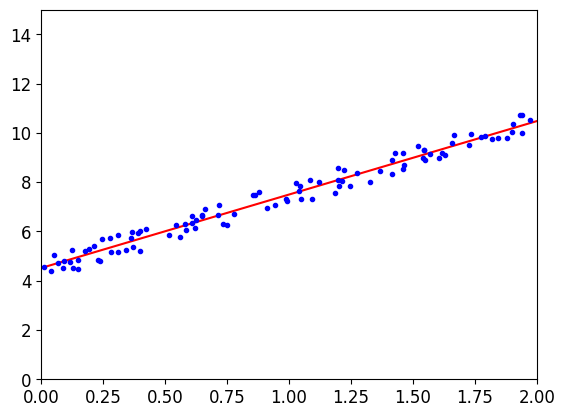

In [10]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [12]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [13]:
theta_best_svd,residuals,rank,s= np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [14]:
np.linalg.pinv(X_b).dot(y)
#theta hat = X+ y, where X+ is the pseudoinverse of X

array([[4.51359766],
       [2.98323418]])

In [16]:
eta=0.1 #learning rate
n_iterations =1000
m=100 #number of training example
theta = np.random.randn(2,1) #random initialization

for itertaion in range (n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
theta


array([[4.51359766],
       [2.98323418]])

In [20]:
#stochastic gradient descent

n_epochs = 50 #epoch means each round
t0,t1 = 5,50 #learning schedule hyperparameter
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.rand(2,1) #random initalization
for epoch in range ( n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
theta
        


array([[4.51886458],
       [2.98451565]])

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty = None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.47537312]), array([2.97005975]))

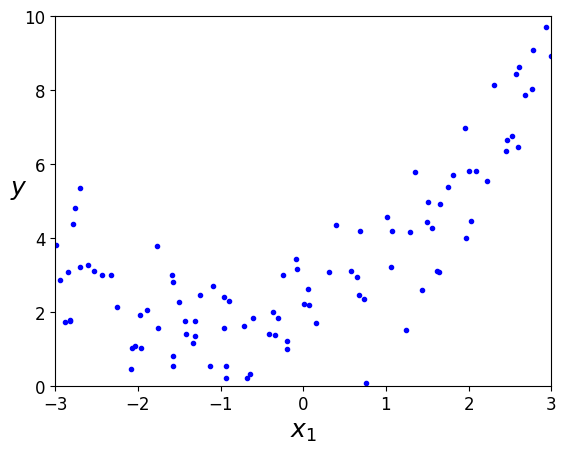

In [23]:
#npone linear 


m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False) #adding 2nd degree of each feature
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.50198628])

In [26]:
X_poly[0]

array([-1.50198628,  2.2559628 ])

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.90987867]), array([[0.91786105, 0.48297014]]))

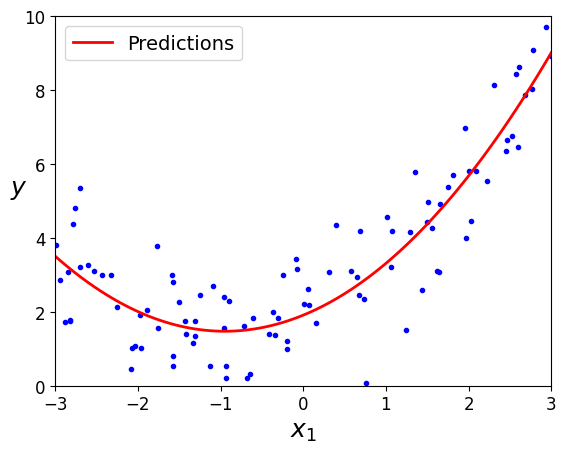

In [28]:


X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

In [31]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

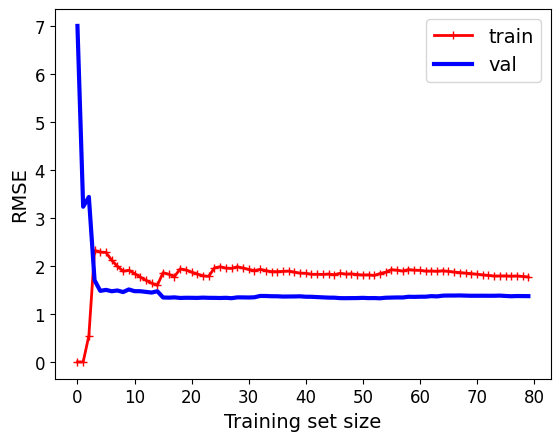

In [32]:

    lin_reg = LinearRegression()
    plot_learning_curves(lin_reg, X, y)

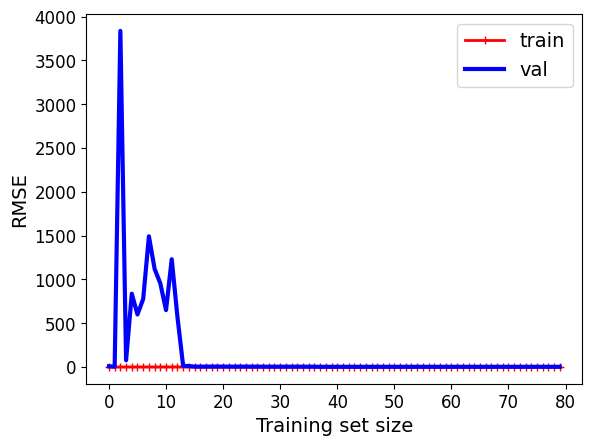

In [35]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
     
])
plot_learning_curves(polynomial_regression,X,y)

In [36]:
#ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])



array([[4.7448162]])

In [39]:

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.73573393])

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([4.69733819])

In [41]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.70142063])

In [ ]:
#early stopping
from sklearn.base import clone
poly_scalar= Pipeline([
    (
        "poly_features",PolynomialFeatures(degree=90,include_bias=False)
    ),
    ("std_scalar",StandardScaler())
])
x_trian_poly_scaled = poly_scalar.fit_transform(X_train)
X_val_poly_scaled = poly_scalar.transform(X_val)
sgd_reg = SGDRegressor (max_iter =1, tol= -np.infty,warm_start=True,
                        penalty=None,learning_rate = "constant",eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared-eror(y_val,y_val_predict)
    if val_error <minimum_val_eror:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [42]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [45]:

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)

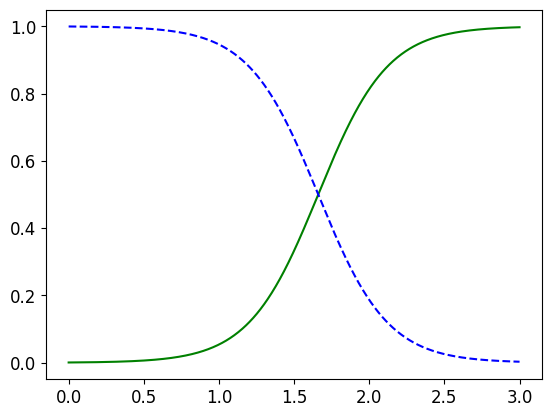

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],'b--',label="Not iris_virginica")

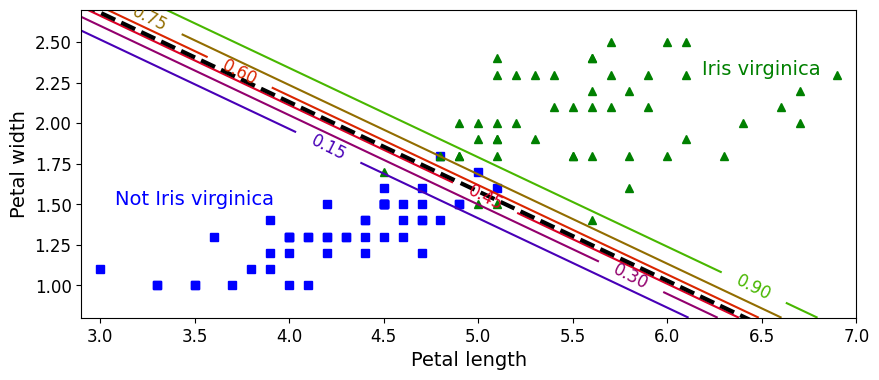

In [47]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [48]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([1])

In [49]:
softmax_reg.predict_proba([[5, 2]])

array([[0.04687836, 0.95312164]])